## Importy types

In [279]:
from typing import List

import random as rd
import pandas as pd

## Training & Test set

First load the data set and the dependend and independend variables

In [280]:
csv_file = './data/palmerpenguins_original.csv'
data = pd.read_csv(csv_file)

df = data.loc[:, ['species', 'sex', 'bill_length_mm', 'body_mass_g']]
df = df.dropna()
df

,species,sex,bill_length_mm,body_mass_g
0,Adelie,male,39.1,3750.0
1,Adelie,female,39.5,3800.0
2,Adelie,female,40.3,3250.0
4,Adelie,female,36.7,3450.0
5,Adelie,male,39.3,3650.0
...,...,...,...,...
339,Chinstrap,male,55.8,4000.0
340,Chinstrap,female,43.5,3400.0
341,Chinstrap,male,49.6,3775.0
342,Chinstrap,male,50.8,4100.0


One hot encode or categoriize strings

In [281]:
def get_specimen_index(sp: str) -> int:
    species = df['species'].unique()

    for i in range(len(species)):
        specimen = species[i]

        if specimen.lower() == sp.lower():
            return i
        
    return 0

data_set = df
data_set['species_category'] = [get_specimen_index(sp) for sp in df['species']]
data_set['is_male'] = [1 if sex == 'male' else 0 for sex in df['sex']]

data_set = data_set.drop(columns=['species', 'sex'])
data_set


,bill_length_mm,body_mass_g,species_category,is_male
0,39.1,3750.0,0,1
1,39.5,3800.0,0,0
2,40.3,3250.0,0,0
4,36.7,3450.0,0,0
5,39.3,3650.0,0,1
...,...,...,...,...
339,55.8,4000.0,2,1
340,43.5,3400.0,2,0
341,49.6,3775.0,2,1
342,50.8,4100.0,2,1


Split the data up in train and test set to test accuracy

In [282]:
train_data = data_set.sample(frac=0.75, random_state=42)
test_data = data_set.drop(train_data.index)


In [ ]:
class Perceptron:

    def __init__(self):
        self.w1 = None
        self.w2 = None
        self.w3 = None
        self.bias = None


    def fit(self, X1, X2, X3, Y, 
            learning_rate=0.001, epochs=50):
        
        losses = []
        for epoch in range(epochs):
            epoch_loss = 0

            for row_index in range(len(X1)):
                x1, x2, x3, y = X1[row_index], X2[row_index], X3[row_index], Y[row_index]
                
                # Predict current output
                ypred = self.predict(x1, x2, x3) 
                
                # Calculate loss (how far off are we?)
                loss = self.__loss__(y, ypred)
                epoch_loss += loss

                # Calculate gradient (how to adjust weights). Increase or decrease weights
                gradient = self.__gradient__(y, ypred)
                
                # Update weights in the direction that reduces error
                # W = W - learning_rate * gradient * input
                
                self.w1 -= learning_rate * gradient * x1
                self.w2 -= learning_rate * gradient * x2
                self.w3 -= learning_rate * gradient * x3
                self.bias -= learning_rate * gradient

            # Average loss for this epoch
            avg_epoch_loss = epoch_loss / len(X1)
            losses.append(avg_epoch_loss)
            
            print(f"Epoch {epoch}: Loss = {avg_epoch_loss:.6f}")

        return losses


    def predict(self, x1, x2, x3):
        y = self.__weighted_sum__(x1, x2, x3)
        return self.__relu__(y)
    
    def __weighted_sum__(self, x1, x2, x3):
        return (x1 * self.w1 + x2 * self.w2 + x3 * self.w3) + self.bias
    
    # f'loss (y, f act(∑▒𝑥 * 𝑤 + 𝑏)) * f' act(∑ x * 𝑤 + 𝑏) * x
    def __gradient__(self, target: float, predicted: float):
        # Gradient / derivative for squared loss
        # Tells us how to adjust weights to reduce error
        return -2 * (target - predicted)

    def __loss__(self, target: float, predicted: float):
        return (target - predicted) ** 2
    
    def __relu__(self, x):
        return max(0, x) 


In [284]:
def initialize_network(nn: Perceptron) -> Perceptron:    
    nn.bias = 0
    nn.w1 = rd.uniform(-0.1, 0.1)  # Random float between -0.1 and 0.1
    nn.w2 = rd.uniform(-0.1, 0.1)
    nn.w3 = rd.uniform(-0.1, 0.1)

    return nn

In [285]:
perceptron = Perceptron()
initialize_network(perceptron)

train_x1, train_x2, train_x3, train_y = train_data['bill_length_mm'], train_data['species_category'], train_data['is_male'], train_data['body_mass_g']
test_x1, test_x2, test_x3, test_y = test_data['bill_length_mm'], test_data['species_category'], test_data['is_male'], test_data['body_mass_g']


In [286]:
losses = perceptron.fit(
    train_x1.tolist(), 
    train_x2.tolist(), 
    train_x3.tolist(), 
    train_y.tolist(), 
    epochs=75, 
    learning_rate=0.0001
)

Epoch 0: Loss = 644539.045801
Epoch 1: Loss = 557997.921657
Epoch 2: Loss = 553101.701236
Epoch 3: Loss = 548426.294673
Epoch 4: Loss = 543961.257434
Epoch 5: Loss = 539696.650937
Epoch 6: Loss = 535623.017754
Epoch 7: Loss = 531731.358027
Epoch 8: Loss = 528013.107055
Epoch 9: Loss = 524460.113981
Epoch 10: Loss = 521064.621528
Epoch 11: Loss = 517819.246739
Epoch 12: Loss = 514716.962661
Epoch 13: Loss = 511751.080931
Epoch 14: Loss = 508915.235224
Epoch 15: Loss = 506203.365512
Epoch 16: Loss = 503609.703098
Epoch 17: Loss = 501128.756391
Epoch 18: Loss = 498755.297373
Epoch 19: Loss = 496484.348741
Epoch 20: Loss = 494311.171677
Epoch 21: Loss = 492231.254216
Epoch 22: Loss = 490240.300196
Epoch 23: Loss = 488334.218738
Epoch 24: Loss = 486509.114256
Epoch 25: Loss = 484761.276950
Epoch 26: Loss = 483087.173767
Epoch 27: Loss = 481483.439810
Epoch 28: Loss = 479946.870164
Epoch 29: Loss = 478474.412125
Epoch 30: Loss = 477063.157812
Epoch 31: Loss = 475710.337143
Epoch 32: Loss = 4

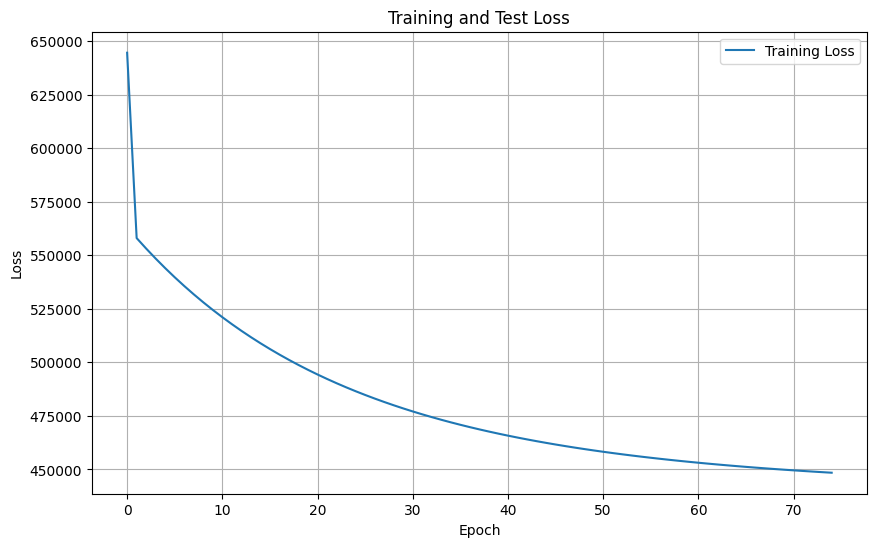

In [287]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

In [288]:
# Evaluation
total = len(test_data)
correct = 0
mse = 0

for i, row in test_data.iterrows():
    x1, x2, x3, y = row['bill_length_mm'], row['species_category'], row['is_male'], row['body_mass_g']
    
    ypred = perceptron.predict(x1, x2, x3)

    print(x1, x2, x3, y, ypred)

    if abs(ypred - y) <= 0.1 * y:  # 10% tolerance
        correct += 1

    # Mean Squared Error
    mse += (ypred - y) ** 2

# Calculate metrics
accuracy = correct / total
mse = mse / total

print(f"Accuracy: {accuracy:.2%}")
print(f"MSE: {mse:.2f}")

39.5 0.0 0.0 3800.0 4058.070575433344
38.6 0.0 1.0 3800.0 4156.743925492942
34.4 0.0 0.0 3325.0 3532.376745146663
46.0 0.0 1.0 4200.0 4919.515365516753
35.3 0.0 0.0 3800.0 3625.146244609018
40.6 0.0 1.0 3550.0 4362.898368742622
39.8 0.0 1.0 4650.0 4280.436591442749
39.6 0.0 1.0 4600.0 4259.821147117782
42.3 0.0 1.0 4150.0 4538.129645504848
34.5 0.0 0.0 2900.0 3542.684467309147
41.4 0.0 1.0 3700.0 4445.3601460424925
39.0 0.0 0.0 3550.0 4006.531964620924
36.5 0.0 0.0 2850.0 3748.838910558826
37.6 0.0 1.0 3750.0 4053.666703868103
35.7 0.0 0.0 3150.0 3666.3771332589545
36.4 0.0 0.0 2850.0 3738.531188396342
35.9 0.0 0.0 3050.0 3686.992577583922
33.5 0.0 0.0 3600.0 3439.6072456843076
37.2 0.0 1.0 3900.0 4012.4358152181676
36.3 0.0 1.0 3800.0 3919.6663157558114
39.6 0.0 1.0 4450.0 4259.821147117782
36.2 0.0 0.0 3300.0 3717.9157440713743
40.3 0.0 1.0 4350.0 4331.975202255169
39.7 0.0 1.0 3550.0 4270.1288692802655
38.1 0.0 0.0 3175.0 3913.762465158569
45.6 0.0 1.0 4600.0 4878.284476866818
39.7 